In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
features = pd.read_csv('alt_acsincome_ca_features_85.csv')
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')

print(features.shape)
print(features.columns)

(166315, 10)
Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P'],
      dtype='object')


In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=0)

sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)

features_test_scaled = sc.transform(features_test)

joblib.dump(sc, 'scaler.joblib')

['scaler.joblib']

# Méthodes avec paramètres par défaults

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


In [29]:
# Default RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(features_train_scaled, labels_train.values.ravel())


RandomForestClassifier()

In [30]:
scoresRF= cross_val_score(RFclassifier, features_train_scaled, labels_train.values.ravel(), cv=5)
print("RandomForestClassifier Accuracy: %0.3f (+/- %0.3f)" % (scoresRF.mean(), scoresRF.std() * 2))

KeyboardInterrupt: 

Classification report : 
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     19629
        True       0.78      0.77      0.77     13634

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion matrix : 


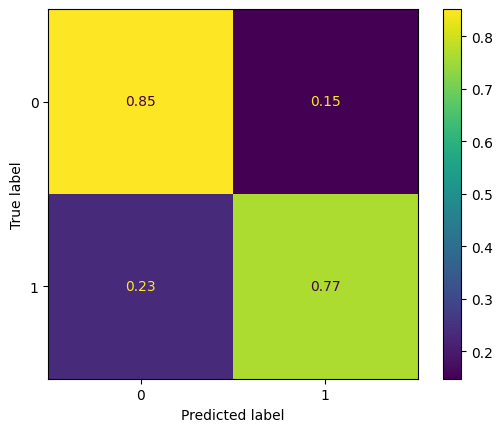

In [36]:

label_pred = RFclassifier.predict(features_test_scaled)
print("Classification report : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()

In [37]:
# Default AdaBoostClassifier
adaBoostClassifier = AdaBoostClassifier()
adaBoostClassifier.fit(features_train_scaled, labels_train.values.ravel())

scoresAdaBoost= cross_val_score(adaBoostClassifier, features_train_scaled, labels_train.values.ravel(), cv=5)

/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The

AdaBoostClassifier Accuracy: 0.808 (+/- 0.005)
Classification report AdaBoost : 
              precision    recall  f1-score   support

       False       0.83      0.84      0.84     19629
        True       0.77      0.76      0.76     13634

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

Confusion matrix AdaBoost : 


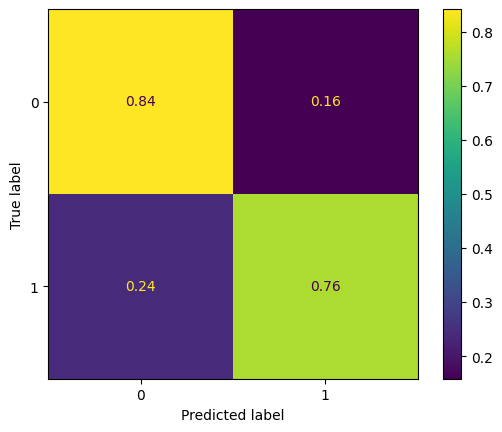

In [39]:
print("AdaBoostClassifier Accuracy: %0.3f (+/- %0.3f)" % (scoresAdaBoost.mean(), scoresAdaBoost.std() * 2))

label_pred = adaBoostClassifier.predict(features_test_scaled)
print("Classification report AdaBoost : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix AdaBoost : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()

In [40]:
#Default GradientBoostingClassifier
gradientBoostingClassifier = GradientBoostingClassifier()
gradientBoostingClassifier.fit(features_train_scaled, labels_train.values.ravel())

scoresGradientBoosting= cross_val_score(gradientBoostingClassifier, features_train_scaled, labels_train.values.ravel(), cv=5)

GradientBoostingClassifier Accuracy: 0.815 (+/- 0.004)
Classification report GradientBoosting : 
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19629
        True       0.78      0.77      0.77     13634

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion matrix GradientBoosting : 


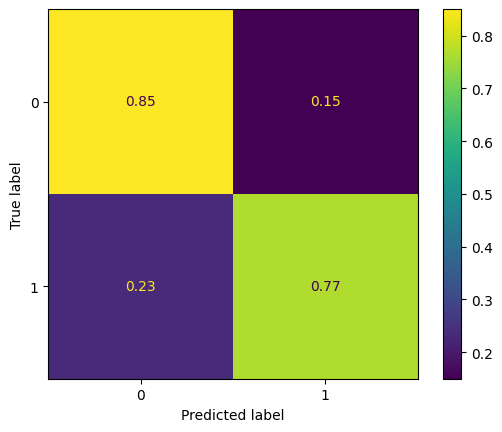

In [41]:

print("GradientBoostingClassifier Accuracy: %0.3f (+/- %0.3f)" % (scoresGradientBoosting.mean(), scoresGradientBoosting.std() * 2))

label_pred = gradientBoostingClassifier.predict(features_test_scaled)
print("Classification report GradientBoosting : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix GradientBoosting : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()


In [50]:
# Default StackingClassifier

estimators = [
    ('rf', RFclassifier),
    ('ada', adaBoostClassifier),
    ('gb', gradientBoostingClassifier)
]

stackingClassifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stackingClassifier.fit(features_train_scaled, labels_train.values.ravel())

scoresStacking= cross_val_score(stackingClassifier, features_train_scaled, labels_train.values.ravel(), cv=5)

/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The

StackingClassifier Accuracy: 0.820 (+/- 0.004)
Classification report Stacking : 
              precision    recall  f1-score   support

       False       0.84      0.86      0.85     19629
        True       0.79      0.77      0.78     13634

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Confusion matrix Stacking : 


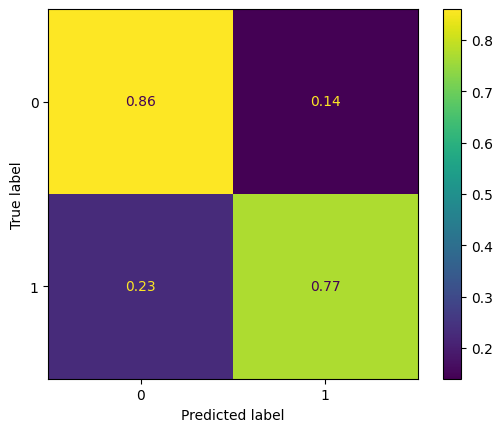

In [51]:

print("StackingClassifier Accuracy: %0.3f (+/- %0.3f)" % (scoresStacking.mean(), scoresStacking.std() * 2))

label_pred = stackingClassifier.predict(features_test_scaled)
print("Classification report Stacking : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix Stacking : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()

## Utilisation de GridSearchCV afin de trouver les bon hyperparamètres 

In [9]:
from sklearn.model_selection import GridSearchCV

In [42]:


#RandomForestClassifier
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
}

grid_search = GridSearchCV(estimator=RFclassifier, param_grid=param_grid, cv=4, n_jobs=1, verbose=2)
grid_search.fit(features_train_scaled, labels_train.values.ravel())

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   3.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=5, min_samples_leaf

In [44]:
#Prints the top 5 best parameters
print("Top 5 best parameters")

results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
results.to_csv('grid_search_results.csv')
results.head()

#save the best model
bestscore = grid_search.best_score_*10**5
titleFile = "RandomForest_BestModel_0"+str(round(bestscore))+".joblib"

joblib.dump(grid_search.best_estimator_, titleFile)

['RandomForest_BestModel_081966.joblib']

In [13]:
#AdaBoostClassifier

param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.1, 0.5, 1, 5]
}

grid_search = GridSearchCV(estimator=adaBoostClassifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(features_train_scaled, labels_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   3.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=300; total time=   9.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=400; total time=  13.0s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=400; total time=  12.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   3.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   3.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   3.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   3.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   3.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   6.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=300; total time=   9.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=300; total time=  10.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  12.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  13.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  12.9s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  13.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=2, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=2, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=2, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=2, n_estimators=50; total time=   1.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=2, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=100; total time=   3.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=200; total time=   6.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=300; total time=  10.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=300; total time=  10.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=300; total time=   9.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=300; total time=   9.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=400; total time=  13.9s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=400; total time=  12.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=2, n_estimators=400; total time=  12.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=5, n_estimators=50; total time=   1.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=100; total time=   3.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=100; total time=   3.3s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=100; total time=   3.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=200; total time=   7.2s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=200; total time=   6.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=200; total time=   6.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=200; total time=   6.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=200; total time=   6.4s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=300; total time=   9.6s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=300; total time=  10.1s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=300; total time=  10.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=300; total time=   9.9s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=300; total time=   9.5s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=400; total time=  12.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=400; total time=  12.8s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=5, n_estimators=400; total time=  12.7s


/home/kelian/Documents/INSA/5A/ApprSupp/tp-supervise/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 2, 5],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=2)

In [14]:
print(grid_search.best_params_)
print(grid_search.best_score_)
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
results.to_csv('grid_search_results_ada.csv')

#save the best model
bestscore = grid_search.best_score_*10**5
titleFile = "AdaBoost_BestModel_0"+str(round(bestscore))+".joblib"

joblib.dump(grid_search.best_estimator_, titleFile)

{'learning_rate': 1, 'n_estimators': 400}
0.8178607253577581


['AdaBoost_BestModel_081786.joblib']

In [15]:
#GradientBoostingClassifier

param_grid = {
    'n_estimators': [50,200, 400],
    'learning_rate': [0.1, 1, 5],
    'max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(estimator=gradientBoostingClassifier, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(features_train, labels_train.values.ravel())

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   2.6s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   2.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   2.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   9.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   9.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   9.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=  19.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=  19.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=  20.1s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   3.9s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   3.9s
[CV] END ....learning_rate=0.1, max_depth=5, n_

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.1, 1, 2, 5],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 200, 400]},
             verbose=2)

In [16]:
#Prints the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
results.to_csv('grid_search_results_gradient.csv')

#save the best model
bestscore = grid_search.best_score_*10**5
titleFile = "GradientBoosting_BestModel_0"+str(round(bestscore))+".joblib"

joblib.dump(grid_search.best_estimator_, titleFile)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
0.8266166619262885


['GradientBoosting_BestModel_082662.joblib']

## Analyse des Résultats

Classification report RandomForest : 
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     19629
        True       0.79      0.78      0.78     13634

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Confusion matrix RandomForest : 
Classification report AdaBoost : 
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     19629
        True       0.78      0.77      0.78     13634

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion matrix AdaBoost : 
Classification report GradientBoosting : 
              precision    recall  f1-score   support

       False       0.85      0.86      0.86     19629
        True       0.79      0.79      0.79     13634

    ac

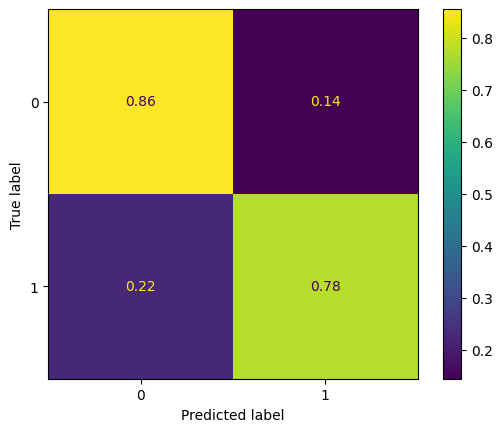

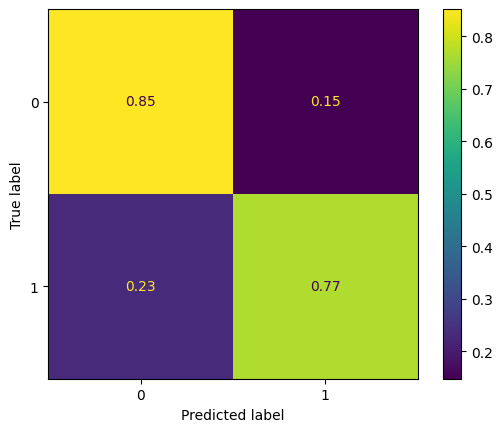

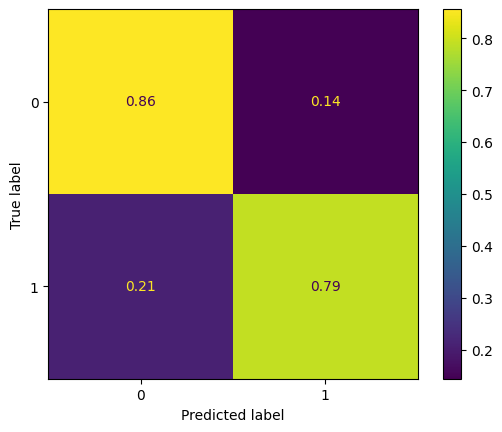

In [86]:
#Load the best model
bestRFclassifier = joblib.load('RandomForest_BestModel_081966.joblib')
bestABClassifier = joblib.load('AdaBoost_BestModel_081786.joblib')
bestGBClassifier = joblib.load('GradientBoosting_BestModel_082683.joblib')


label_pred = bestRFclassifier.predict(features_test_scaled)
print("Classification report RandomForest : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix RandomForest : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()

label_pred = bestABClassifier.predict(features_test_scaled)
print("Classification report AdaBoost : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix AdaBoost : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()

label_pred = bestGBClassifier.predict(features_test_scaled)
print("Classification report GradientBoosting : ")
print(metrics.classification_report(labels_test, label_pred))

print("Confusion matrix GradientBoosting : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, label_pred, normalize='true')).plot()




## Inference sur les jeux de données du Nevada et du Colorado

Classification report Nevada RandomForest : 
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      7417
           1       0.56      0.85      0.67      3368

    accuracy                           0.74     10785
   macro avg       0.73      0.77      0.73     10785
weighted avg       0.80      0.74      0.75     10785

Confusion matrix Nevada RandomForest : 
Classification report Colorado RandomForest : 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     18334
           1       0.70      0.84      0.76     12972

    accuracy                           0.78     31306
   macro avg       0.78      0.79      0.78     31306
weighted avg       0.80      0.78      0.78     31306

Confusion matrix Colorado RandomForest : 
Classification report Nevada AdaBoost : 
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      7417
           1       0.5

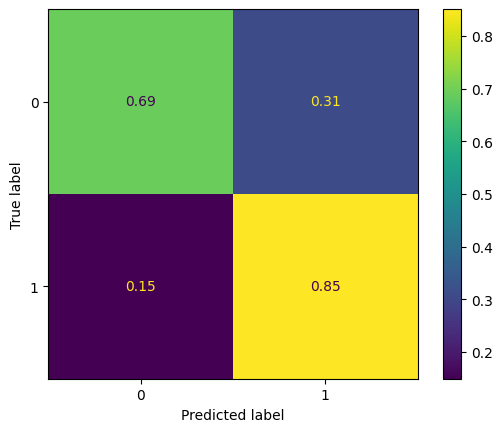

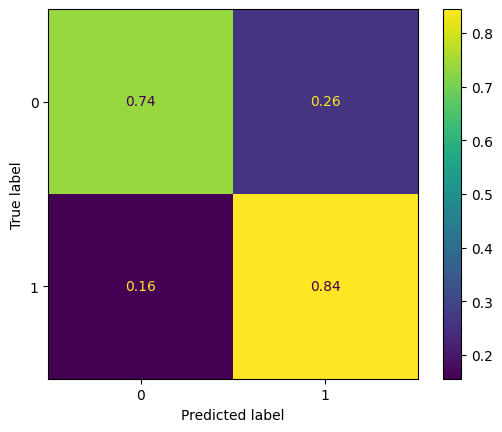

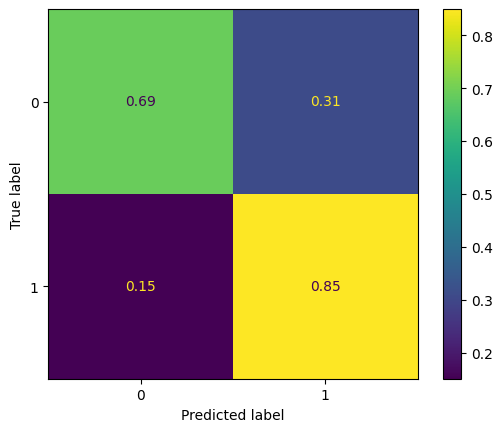

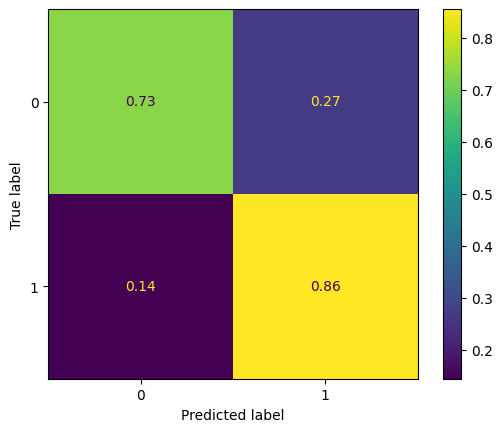

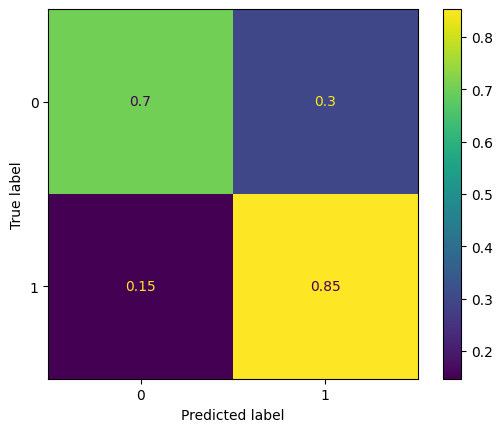

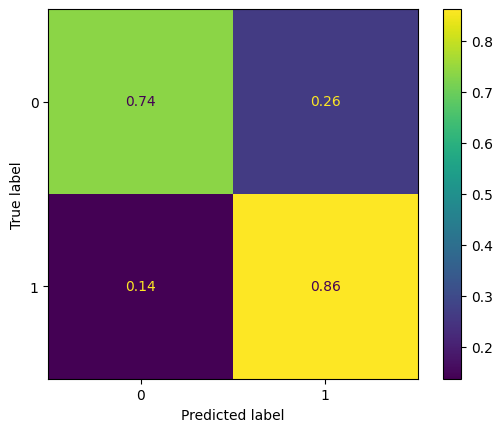

In [18]:
features_nevada = pd.read_csv('acsincome_ne_features.csv')
labels_nevada = pd.read_csv('acsincome_ne_labelTP2.csv')

features_colorado = pd.read_csv('acsincome_co_features.csv')
labels_colorado = pd.read_csv('acsincome_co_label.csv')

sc = joblib.load('scaler.joblib')

features_nevada_scaled = sc.transform(features_nevada)

features_colorado_scaled = sc.transform(features_colorado)

#RandomForestClassifier

label_pred = bestRFclassifier.predict(features_nevada_scaled)

print("Classification report Nevada RandomForest : ")
print(metrics.classification_report(labels_nevada, label_pred))

print("Confusion matrix Nevada RandomForest : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_nevada, label_pred, normalize='true')).plot()

label_pred = bestRFclassifier.predict(features_colorado_scaled)
print("Classification report Colorado RandomForest : ")
print(metrics.classification_report(labels_colorado, label_pred))

print("Confusion matrix Colorado RandomForest : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_colorado, label_pred, normalize='true')).plot()

#AdaBoostClassifier

label_pred = bestABClassifier.predict(features_nevada_scaled)

print("Classification report Nevada AdaBoost : ")
print(metrics.classification_report(labels_nevada, label_pred))

print("Confusion matrix Nevada AdaBoost : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_nevada, label_pred, normalize='true')).plot()

label_pred = bestABClassifier.predict(features_colorado_scaled)
print("Classification report Colorado AdaBoost : ")
print(metrics.classification_report(labels_colorado, label_pred))

print("Confusion matrix Colorado AdaBoost : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_colorado, label_pred, normalize='true')).plot()

#GradientBoostingClassifier

label_pred = bestGBClassifier.predict(features_nevada_scaled)

print("Classification report Nevada GradientBoosting : ")
print(metrics.classification_report(labels_nevada, label_pred))

print("Confusion matrix Nevada GradientBoosting : ")

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_nevada, label_pred, normalize='true')).plot()

label_pred = bestGBClassifier.predict(features_colorado_scaled)
print("Classification report Colorado GradientBoosting : ")
print(metrics.classification_report(labels_colorado, label_pred))

print("Confusion matrix Colorado GradientBoosting : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_colorado, label_pred, normalize='true')).plot()



## Interprétabilité

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Random Forest Correlations (Train): AGEP     0.293459
COW      0.063015
SCHL     0.434593
MAR     -0.300034
OCCP    -0.438486
POBP    -0.125513
RELP    -0.261590
WKHP     0.388058
SEX     -0.133533
RAC1P   -0.129578
dtype: float64
AdaBoost Correlations (Train): AGEP     0.293744
COW      0.068858
SCHL     0.455699
MAR     -0.306361
OCCP    -0.468304
POBP    -0.128889
RELP    -0.270919
WKHP     0.404140
SEX     -0.146551
RAC1P   -0.131596
dtype: float64
Gradient Boosting Correlations (Train): AGEP     0.296228
COW      0.065433
SCHL     0.440041
MAR     -0.301471
OCCP    -0.445865
POBP    -0.127776
RELP    -0.264532
WKHP     0.395520
SEX     -0.138632
RAC1P   -0.129539
dtype: float64


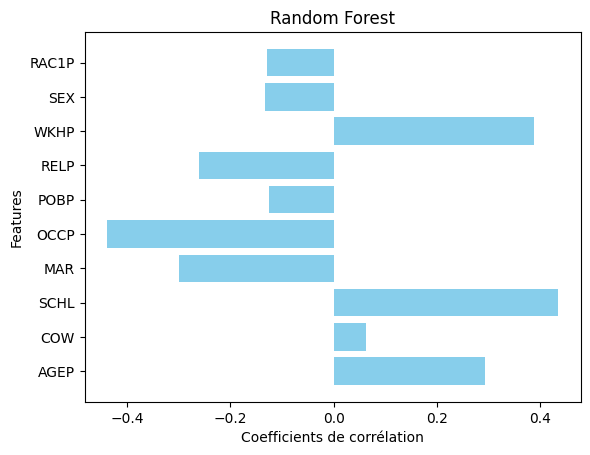

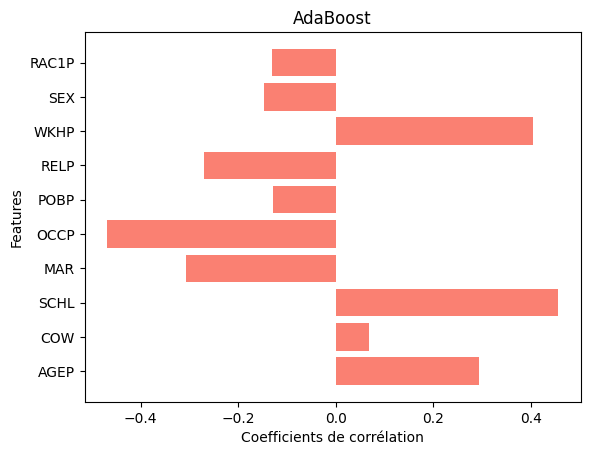

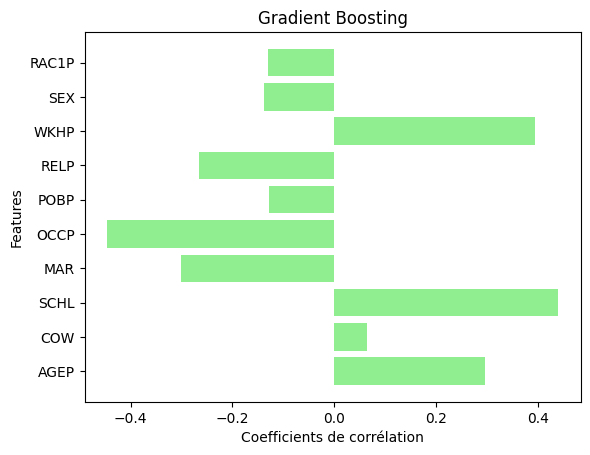

In [97]:
feature_names = ["AGEP","COW","SCHL","MAR","OCCP","POBP","RELP","WKHP","SEX","RAC1P"]

features_train_df = pd.DataFrame(features_train_scaled, columns=feature_names)

rf_prediction_train = bestRFclassifier.predict(features_train_scaled)
ada_prediction_train = bestABClassifier.predict(features_train_scaled)
gb_prediction_train = bestGBClassifier.predict(features_train_scaled)

corr_rf_train = features_train_df.apply(lambda x: x.corr(pd.Series(rf_prediction_train)))
corr_ada_train = features_train_df.apply(lambda x: x.corr(pd.Series(ada_prediction_train)))
corr_gb_train = features_train_df.apply(lambda x: x.corr(pd.Series(gb_prediction_train)))

print("Random Forest Correlations (Train):", corr_rf_train)
print("AdaBoost Correlations (Train):", corr_ada_train)
print("Gradient Boosting Correlations (Train):", corr_gb_train)


plt.barh(corr_rf_train.index, corr_rf_train, color='skyblue')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('Random Forest')
plt.show()

plt.barh(corr_ada_train.index, corr_ada_train, color='salmon')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('AdaBoost')
plt.show()

plt.barh(corr_gb_train.index, corr_gb_train, color='lightgreen')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('Gradient Boosting')
plt.show()

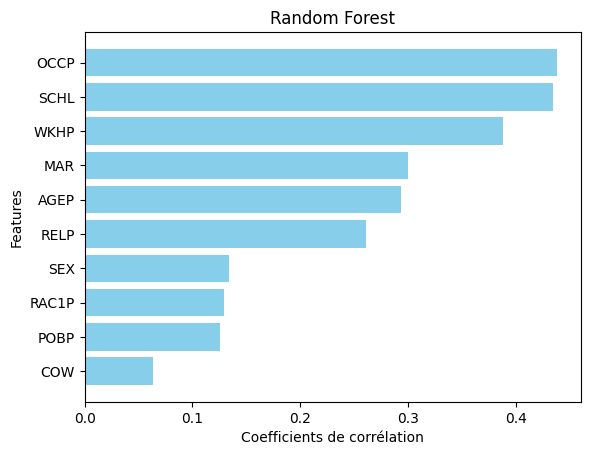

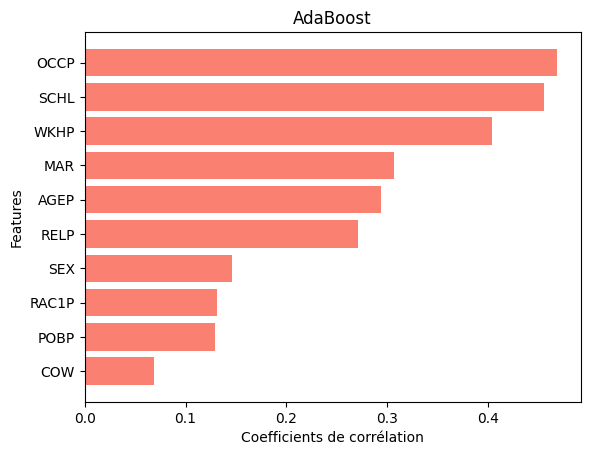

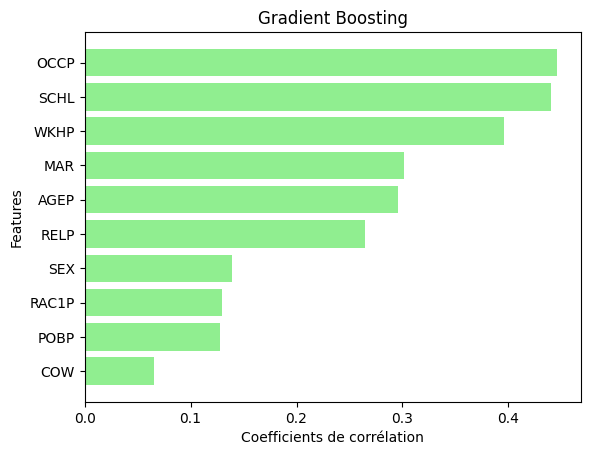

In [98]:
corr_rf_train_sorted = corr_rf_train.abs().sort_values(ascending=True)
corr_ada_train_sorted = corr_ada_train.abs().sort_values(ascending=True)
corr_gb_train_sorted = corr_gb_train.abs().sort_values(ascending=True)

plt.barh(corr_rf_train_sorted.index, corr_rf_train_sorted, color='skyblue')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('Random Forest')
plt.show()

plt.barh(corr_ada_train_sorted.index, corr_ada_train_sorted, color='salmon')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('AdaBoost')
plt.show()

plt.barh(corr_gb_train_sorted.index, corr_gb_train_sorted, color='lightgreen')
plt.xlabel('Coefficients de corrélation')
plt.ylabel('Features')
plt.title('Gradient Boosting')
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

#Pas reussi à faire fonctionner
result = permutation_importance(bestRFclassifier, features_train_scaled, labels_train.values.ravel())
sorted_idx = result.importances_mean.argsort()

plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest')
plt.show()

KeyboardInterrupt: 

In [109]:
# Prédictions des modèles sur les données d'entraînement
df_equity_df = features_train_df.copy()
df_equity_df['RF_Predictions'] = rf_prediction_train
df_equity_df['ADA_Predictions'] = ada_prediction_train
df_equity_df['GB_Predictions'] = gb_prediction_train

df_equity_df['SEX'] = df_equity_df['SEX'].round()


# RF Individus ayant un revenu supérieur à 50k
rf_high_income = df_equity_df[df_equity_df['RF_Predictions'] == 1]
rf_men_high_income = rf_high_income[rf_high_income['SEX'] == -1]  # Hommes
rf_women_high_income = rf_high_income[rf_high_income['SEX'] == 1]  # Femmes

ada_high_income = df_equity_df[df_equity_df['ADA_Predictions'] == 1]
ada_men_high_income = ada_high_income[ada_high_income['SEX'] == -1]  # Hommes
ada_women_high_income = ada_high_income[ada_high_income['SEX'] == 1]  # Femmes

gb_high_income = df_equity_df[df_equity_df['GB_Predictions'] == 1]
gb_men_high_income = gb_high_income[gb_high_income['SEX'] == -1]  # Hommes
gb_women_high_income = gb_high_income[gb_high_income['SEX'] == 1]  # Femmes

# Affichage des résultats
print("Résultats des prédictions des modèles :")
print("Random Forest:")
print(f"  Total d'individus ayant un revenu > 50k : {len(rf_high_income)}")
print(f"  Hommes ayant un revenu > 50k : {len(rf_men_high_income)}")
print(f"  Femmes ayant un revenu > 50k : {len(rf_women_high_income)}")

print("\nAdaBoost:")
print(f"  Total d'individus ayant un revenu > 50k : {len(ada_high_income)}")
print(f"  Hommes ayant un revenu > 50k : {len(ada_men_high_income)}")
print(f"  Femmes ayant un revenu > 50k : {len(ada_women_high_income)}")

print("\nGradient Boosting:")
print(f"  Total d'individus ayant un revenu > 50k : {len(gb_high_income)}")
print(f"  Hommes ayant un revenu > 50k : {len(gb_men_high_income)}")
print(f"  Femmes ayant un revenu > 50k : {len(gb_women_high_income)}")


Résultats des prédictions des modèles :
Random Forest:
  Total d'individus ayant un revenu > 50k : 53952
  Hommes ayant un revenu > 50k : 32826
  Femmes ayant un revenu > 50k : 21126

AdaBoost:
  Total d'individus ayant un revenu > 50k : 53676
  Hommes ayant un revenu > 50k : 33101
  Femmes ayant un revenu > 50k : 20575

Gradient Boosting:
  Total d'individus ayant un revenu > 50k : 54312
  Hommes ayant un revenu > 50k : 33187
  Femmes ayant un revenu > 50k : 21125



Modèle : RF
Statistical Parity:
  Hommes: 0.47
  Femmes: 0.34
Equal Opportunity:
  Hommes: 0.89
  Femmes: 0.84
Predictive Equality:
  Hommes: 0.10
  Femmes: 0.06

Modèle : ADA
Statistical Parity:
  Hommes: 0.47
  Femmes: 0.33
Equal Opportunity:
  Hommes: 0.80
  Femmes: 0.72
Predictive Equality:
  Hommes: 0.18
  Femmes: 0.12

Modèle : GB
Statistical Parity:
  Hommes: 0.47
  Femmes: 0.34
Equal Opportunity:
  Hommes: 0.83
  Femmes: 0.77
Predictive Equality:
  Hommes: 0.16
  Femmes: 0.11


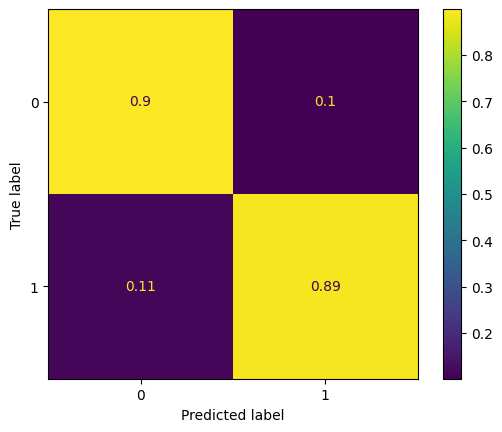

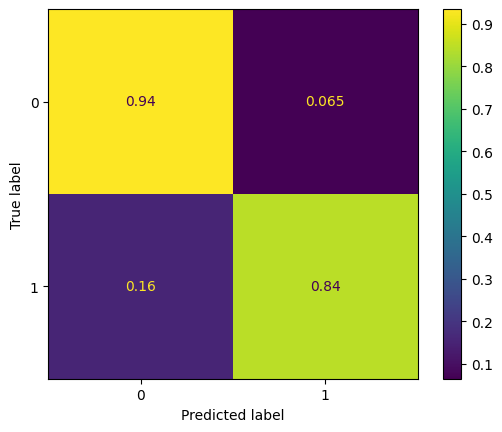

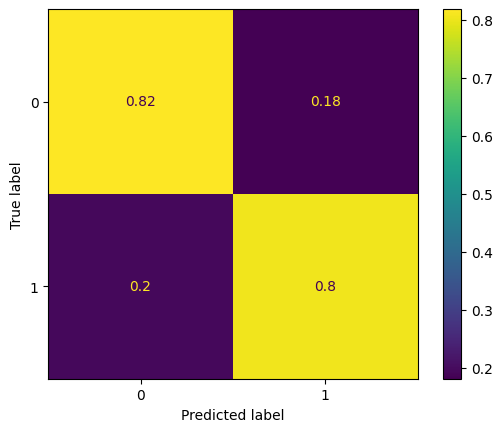

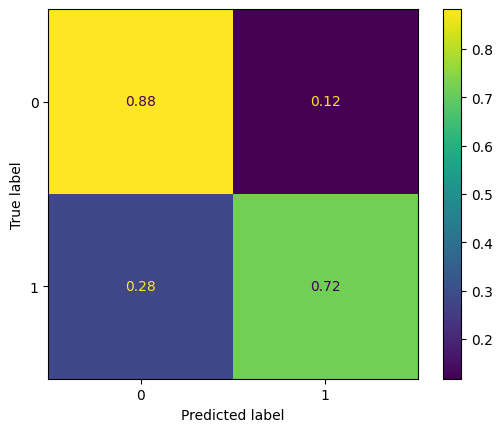

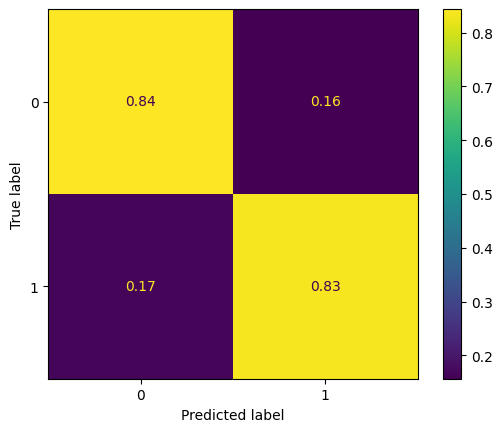

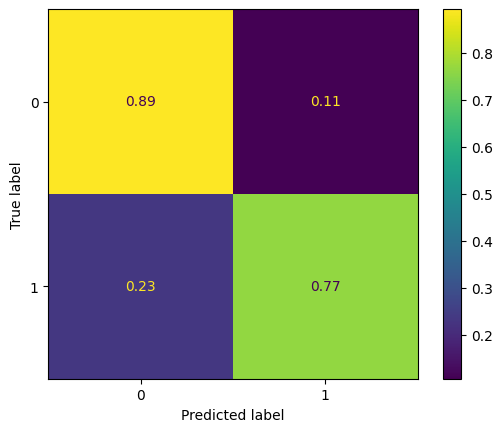

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialisation des résultats
results = {}

# Pour chaque modèle
for model_name, predictions in [("RF", rf_prediction_train),
                                 ("ADA", ada_prediction_train),
                                 ("GB", gb_prediction_train)]:
    # Ajouter les prédictions au DataFrame
    df_equity_df[f"{model_name}_Predictions"] = predictions

    #Ajouter la vrai valeur
    df_equity_df["True_Label"] = labels_train.values.ravel()
    
    # Séparer par genre
    men = df_equity_df[df_equity_df['SEX'] == -1]
    women = df_equity_df[df_equity_df['SEX'] == 1]
    
    # Matrices de confusion
    cm_men = confusion_matrix(men["True_Label"], men[f"{model_name}_Predictions"])
    cm_women = confusion_matrix(women["True_Label"], women[f"{model_name}_Predictions"])

    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(men["True_Label"], men[f"{model_name}_Predictions"], normalize='true')).plot()
    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(women["True_Label"], women[f"{model_name}_Predictions"], normalize='true')).plot()
    
    # Extraire les éléments des matrices de confusion
    tn_men, fp_men, fn_men, tp_men = cm_men.ravel()
    tn_women, fp_women, fn_women, tp_women = cm_women.ravel()
    
    # Calcul des métriques
    sp_men = (tp_men + fp_men) / len(men)  # Statistical Parity
    sp_women = (tp_women + fp_women) / len(women)
    
    eo_men = tp_men / (tp_men + fn_men) if (tp_men + fn_men) > 0 else 0  # Equal Opportunity
    eo_women = tp_women / (tp_women + fn_women) if (tp_women + fn_women) > 0 else 0
    
    pe_men = fp_men / (fp_men + tn_men) if (fp_men + tn_men) > 0 else 0  # Predictive Equality
    pe_women = fp_women / (fp_women + tn_women) if (fp_women + tn_women) > 0 else 0
    
    # Sauvegarder les résultats
    results[model_name] = {
        "Statistical Parity": {"Men": sp_men, "Women": sp_women},
        "Equal Opportunity": {"Men": eo_men, "Women": eo_women},
        "Predictive Equality": {"Men": pe_men, "Women": pe_women}
    }

# Afficher les résultats
for model_name, metrics in results.items():
    print(f"\nModèle : {model_name}")
    print("Statistical Parity:")
    print(f"  Hommes: {metrics['Statistical Parity']['Men']:.2f}")
    print(f"  Femmes: {metrics['Statistical Parity']['Women']:.2f}")
    print("Equal Opportunity:")
    print(f"  Hommes: {metrics['Equal Opportunity']['Men']:.2f}")
    print(f"  Femmes: {metrics['Equal Opportunity']['Women']:.2f}")
    print("Predictive Equality:")
    print(f"  Hommes: {metrics['Predictive Equality']['Men']:.2f}")
    print(f"  Femmes: {metrics['Predictive Equality']['Women']:.2f}")


Classification report RandomForest : 
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19629
        True       0.78      0.76      0.77     13634

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263

Confusion matrix RandomForest : 


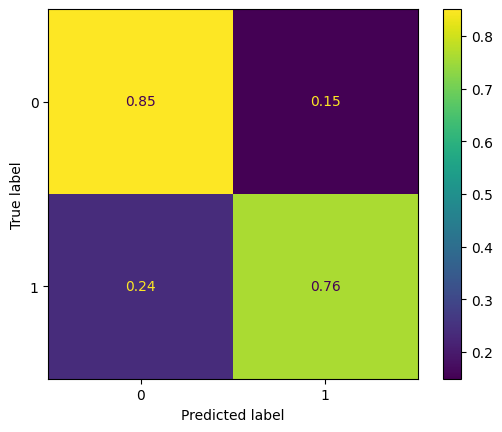

In [151]:
# Convertir les arrays numpy en DataFrame pandas avec les noms de colonnes appropriés
feature_names = ["AGEP","COW","SCHL","MAR","OCCP","POBP","RELP","WKHP","SEX","RAC1P"]
features_train_df = pd.DataFrame(features_train_scaled, columns=feature_names)
features_test_df = pd.DataFrame(features_test_scaled, columns=feature_names)

# Retirer la colonne 'SEX' du DataFrame
features_without_sex_train = features_train_df.drop(columns=['SEX'])
features_without_sex_test = features_test_df.drop(columns=['SEX'])

# Entraîner le modèle RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(features_without_sex_train, labels_train.values.ravel())

# Faire des prédictions sur le jeu de test
rf_prediction = rf_model.predict(features_without_sex_test)

# Affichage du rapport de classification et de la matrice de confusion
print("Classification report RandomForest : ")
print(metrics.classification_report(labels_test, rf_prediction))

print("Confusion matrix RandomForest : ")
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(labels_test, rf_prediction, normalize='true')).plot()



Hommes: 8036 1423 1918 6229
Femmes: 8665 1505 1343 4144
Statistical Parity:
Hommes:  0.434624559809156
Femmes:  0.36079708756466755
Equal Opportunity:
Hommes:  0.7645759175156499
Femmes:  0.7552396573719701
Predictive Equality:
Hommes:  0.15043873559572893
Femmes:  0.147984267453294


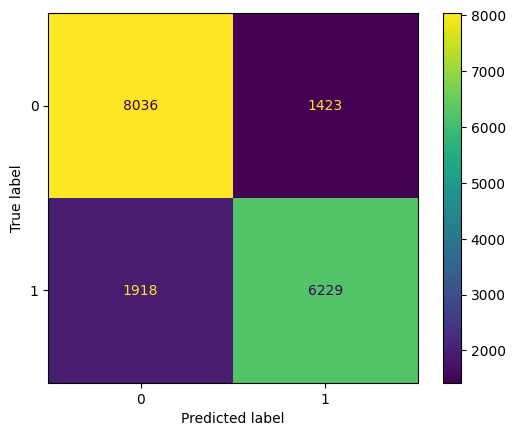

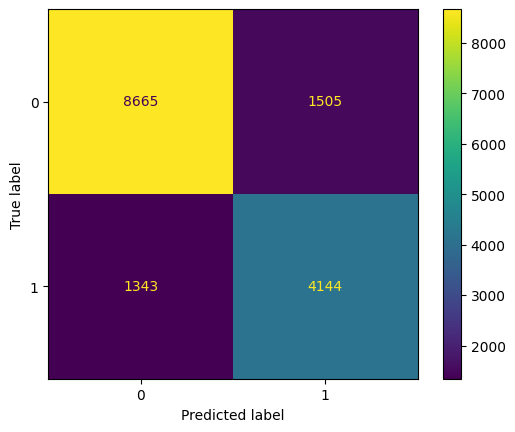

In [169]:
features_test_df['Prediction'] = rf_prediction
features_test_df['True_Label'] = labels_test.values.ravel()

features_test_df['SEX'] = round(features_test_df['SEX'])

# Séparer par genre
men = features_test_df[features_test_df['SEX'] == -1]
women = features_test_df[features_test_df['SEX'] == 1]

# Matrices de confusion
cm_men = confusion_matrix(men["True_Label"], men["Prediction"])
cm_women = confusion_matrix(women["True_Label"], women["Prediction"])

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(men["True_Label"], men["Prediction"])).plot()
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(women["True_Label"], women["Prediction"])).plot()

# Extraire les éléments des matrices de confusion
tn_men, fp_men, fn_men, tp_men = cm_men.ravel()
tn_women, fp_women, fn_women, tp_women = cm_women.ravel()

print("Hommes:", tn_men, fp_men, fn_men, tp_men)
print("Femmes:", tn_women, fp_women, fn_women, tp_women)

# Calcul des métriques
sp_men = (tp_men + fp_men) / len(men) 
sp_women = (tp_women + fp_women) / len(women)

eo_men = tp_men / (tp_men + fn_men) if (tp_men + fn_men) > 0 else 0  
eo_women = tp_women / (tp_women + fn_women) if (tp_women + fn_women) > 0 else 0

pe_men = fp_men / (fp_men + tn_men) if (fp_men + tn_men) > 0 else 0 
pe_women = fp_women / (fp_women + tn_women) if (fp_women + tn_women) > 0 else 0

# Print results
print("Statistical Parity:")
print("Hommes: ", sp_men)
print("Femmes: ", sp_women)
print("Equal Opportunity:")
print("Hommes: ", eo_men)
print("Femmes: ", eo_women)
print("Predictive Equality:")
print("Hommes: ", pe_men)
print("Femmes: ", pe_women)

